In [2]:
!pip install pandas nltk textblob

In [3]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 데이터 다운로드 (처음 한 번만 실행)
# nltk.download('punkt')
# nltk.download('stopwords')

# 데이터 로드
input_file_path = './data/result_review.csv'  # 원본 파일 경로
data = pd.read_csv(input_file_path)

# 데이터 확인
print(data.head())

# 전처리 함수 정의
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()
    # 토큰화
    tokens = word_tokenize(text)
    # 불용어 제거
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    # 원상 복구
    return ' '.join(tokens)

# 전처리 적용
data['cleaned_review'] = data['review'].apply(preprocess_text)

# 전처리된 데이터 확인
print(data[['review', 'cleaned_review']].head())

# 감정 분석 함수 정의
def analyze_sentiment(text):
    blob = TextBlob(text)
    # 감정 점수 및 감정 카테고리
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# 감정 분석 적용
data[['polarity', 'subjectivity']] = data['cleaned_review'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 결과 확인
print(data[['review', 'cleaned_review', 'polarity', 'subjectivity']].head())

# 감정 점수의 기본 통계
print(data[['polarity', 'subjectivity']].describe())

# 결과를 CSV 파일로 저장
output_file_path = './data/result_review_with_sentiment.csv'  # 결과 파일 경로
data.to_csv(output_file_path, index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smhrd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smhrd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


   review_idx        cos_name  user_nm  rating  \
0           0  원더 세라마이드 모찌 토너     두치봉구       5   
1           1  원더 세라마이드 모찌 토너  리뷰쓰는핑핑이       5   
2           2  원더 세라마이드 모찌 토너   베리베리피치       5   
3           3  원더 세라마이드 모찌 토너      냐람지       5   
4           4  원더 세라마이드 모찌 토너     헤헤헷잉       5   

                                              review  
0  완전 가성비 최고 대용량 토너예요! 가격도 엄청 저렴한데 용량이 어마무시해서 스킨팩...  
1  예전에 패드 너어어어무 만족해하며 썼던 기억이 떠올라서 구매해 본 토너입니다!! 아...  
2  이것민 바르고 화장한다는데 좋네요. 기존 토너보단 에멀젼 느낌이라 지성분들 이것만 ...  
3  벌써 n병째 재구매하는, 이제는 없어서는 안 될 필수템  지성인 나에게는 4계절 모...  
4  열분 이거 가성비 갑입니다 양만 믾은 것도 아니고 제품력도 좋습니다  여러번 챱챱 ...  
                                              review  \
0  완전 가성비 최고 대용량 토너예요! 가격도 엄청 저렴한데 용량이 어마무시해서 스킨팩...   
1  예전에 패드 너어어어무 만족해하며 썼던 기억이 떠올라서 구매해 본 토너입니다!! 아...   
2  이것민 바르고 화장한다는데 좋네요. 기존 토너보단 에멀젼 느낌이라 지성분들 이것만 ...   
3  벌써 n병째 재구매하는, 이제는 없어서는 안 될 필수템  지성인 나에게는 4계절 모...   
4  열분 이거 가성비 갑입니다 양만 믾은 것도 아니고 제품력도 좋습니다  여러번 챱챱 ...   

                                

#### 이걸로는 결과가 잘 안 나옴..
Polarity와 Subjectivity의 대부분이 0: 데이터의 대부분이 극성(감정의 긍정 또는 부정)과 주관성(개인적 의견의 정도)에서 중립적입니다. 이는 감정 분석이 부정확하거나 데이터가 충분히 구체적이지 않을 수 있음을 시사합니다.
범위와 통계량: 전체 polarity와 subjectivity 값의 범위가 좁아서 분석 결과가 중립적인 경향이 많습니다.
이러한 결과는 감정 분석 도구가 제대로 작동하지 않았거나, 리뷰 내용이 감정 분석을 하기에는 너무 중립적이거나 일반적일 수 있음을 의미할 수 있습니다. 만약 감정 분석 결과가 0에 수렴한다면, 모델을 교체하거나 데이터 전처리를 다시 검토할 필요가 있습니다.
#### 뭐가 문제인지 모르니 전처리부터 다시 함

In [18]:
import pandas as pd
import re
from konlpy.tag import Okt

# Okt 객체를 함수 외부에서 생성
okt = Okt()

def preprocess_text_korean(text):
    # 한글만 남기고 다른 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # 토큰화
    tokens = okt.morphs(text)
    
    # 불용어 리스트 정의 (필요에 따라 수정)
    stop_words = set(['을', '를', '이', '가', '의', '에', '게', '한', '은', '는', '과', '와'])
    
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    
    # 토큰을 공백으로 결합
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# 데이터 불러오기
df = pd.read_csv('./data/result_review.csv')

# 데이터프레임에 정제 함수 적용
df['cleaned_review'] = df['review'].apply(preprocess_text_korean)

# 결과 확인
print(df[['review', 'cleaned_review']].head())

# 전처리된 데이터 저장 (선택사항)
df.to_csv('./data/result_review_cleaned.csv', index=False)


                                              review  \
0  완전 가성비 최고 대용량 토너예요! 가격도 엄청 저렴한데 용량이 어마무시해서 스킨팩...   
1  예전에 패드 너어어어무 만족해하며 썼던 기억이 떠올라서 구매해 본 토너입니다!! 아...   
2  이것민 바르고 화장한다는데 좋네요. 기존 토너보단 에멀젼 느낌이라 지성분들 이것만 ...   
3  벌써 n병째 재구매하는, 이제는 없어서는 안 될 필수템  지성인 나에게는 4계절 모...   
4  열분 이거 가성비 갑입니다 양만 믾은 것도 아니고 제품력도 좋습니다  여러번 챱챱 ...   

                                      cleaned_review  
0  완전 가성 비 최고 대 용량 토너 예요 가격 도 엄청 저렴한데 용량 어마 무시 해서...  
1  예전 패드 너 어어 어 무 만족해하며 썼던 기억 떠올라서 구매 해 본 토너 입니다 ...  
2  것민 바르고 화장 한다는데 좋네요 기존 토너 보단 에멀젼 느낌 이라 지성 분들 것 ...  
3  벌써 병 째 재구 매하 이제 없어서는 안 될 필수 템 지성인 나 에게는 계절 모두 ...  
4  열 분 거 가성 비 갑 입니다 양 만 믾 것 도 아니고 제품 력 도 좋습니다 여러 ...  


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# 데이터 불러오기
df = pd.read_csv('./data/result_review_cleaned.csv')

# NaN 값을 빈 문자열로 대체
df['cleaned_review'].fillna('', inplace=True)

# 감정 레이블 생성
def create_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(create_label)

# 데이터 확인
print(df[['rating', 'sentiment']].head())

   rating sentiment
0       5  positive
1       5  positive
2       5  positive
3       5  positive
4       5  positive


In [23]:

# 특성 및 레이블 설정
X = df['cleaned_review']
y = df['sentiment']

# 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 데이터를 벡터화
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 모델 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 모델 예측
y_pred = model.predict(X_test_tfidf)

# 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 전체 데이터에 대한 예측
df['predicted_sentiment'] = model.predict(vectorizer.transform(df['cleaned_review']))

# 결과 저장
df.to_csv('./data/result_review_with_sentiment.csv', index=False)

print("감정 분석 결과가 'result_review_with_sentiment.csv' 파일에 저장되었습니다.")

Accuracy: 0.8641791044776119
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        39
     neutral       0.00      0.00      0.00       143
    positive       0.86      1.00      0.93      1158

    accuracy                           0.86      1340
   macro avg       0.29      0.33      0.31      1340
weighted avg       0.75      0.86      0.80      1340



C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


감정 분석 결과가 'result_review_with_sentiment.csv' 파일에 저장되었습니다.


결과 해석
Accuracy (정확도):

0.8642: 전체 데이터에서 모델이 정확하게 예측한 비율입니다. 약 86.42%의 정확도를 보이고 있습니다.
Precision (정밀도):

Negative: 0.00
Neutral: 0.00
Positive: 0.86
정밀도는 모델이 특정 클래스를 Positive로 예측했을 때 실제로 그 클래스에 속할 확률을 의미합니다. Negative와 Neutral 클래스에 대해 정밀도가 0.00인 이유는 이 두 클래스의 예측이 전혀 없다는 것을 의미합니다.
Recall (재현율):

Negative: 0.00
Neutral: 0.00
Positive: 1.00
재현율은 실제로 특정 클래스에 속하는 샘플 중 모델이 올바르게 예측한 비율을 나타냅니다. Negative와 Neutral 클래스의 재현율이 0.00인 이유는 이들 클래스의 샘플을 전혀 예측하지 못했기 때문입니다. Positive 클래스는 완벽하게 예측하고 있습니다.
F1-Score:

Negative: 0.00
Neutral: 0.00
Positive: 0.93
F1-Score는 Precision과 Recall의 조화 평균으로, 각 클래스의 성능을 종합적으로 평가합니다. Positive 클래스는 높은 F1-Score를 가지지만, 다른 두 클래스는 모두 0.00입니다.
Macro Average:

Precision: 0.29
Recall: 0.33
F1-Score: 0.31
Macro Average는 각 클래스의 평균 성능을 평가합니다. Positive 클래스를 제외하면 전체적으로 성능이 낮습니다.
Weighted Average:

Precision: 0.75
Recall: 0.86
F1-Score: 0.80
Weighted Average는 클래스의 지원 수에 따라 평균을 낸 것입니다. Positive 클래스의 비중이 크기 때문에 이 클래스의 성능이 전체 평균에 큰 영향을 미칩니다.

### 해결 위해 다시 도전

In [24]:
import pandas as pd
import re
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv('./data/result_review.csv')

# 감정 레이블 생성 함수
def assign_sentiment_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# 감정 레이블 추가
df['sentiment'] = df['rating'].apply(assign_sentiment_label)

# 전처리 함수 정의
def preprocess_text_korean(text):
    # 한글만 남기고 다른 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)
    
    # Okt 객체 생성
    okt = Okt()
    
    # 토큰화
    tokens = okt.morphs(text)
    
    # 불용어 리스트 정의 (필요에 따라 수정)
    stop_words = set(['을', '를', '이', '가', '의', '에', '게', '한', '은', '는', '과', '와'])
    
    # 불용어 제거
    tokens = [word for word in tokens if word not in stop_words]
    
    # 토큰을 공백으로 결합
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# 리뷰 데이터 전처리
df['cleaned_review'] = df['review'].apply(preprocess_text_korean)

# 전처리된 데이터 확인
print(df[['review', 'cleaned_review']].head())

# 전처리된 데이터 저장
df.to_csv('./data/result_review3_cleaned.csv', index=False)


                                              review  \
0  완전 가성비 최고 대용량 토너예요! 가격도 엄청 저렴한데 용량이 어마무시해서 스킨팩...   
1  예전에 패드 너어어어무 만족해하며 썼던 기억이 떠올라서 구매해 본 토너입니다!! 아...   
2  이것민 바르고 화장한다는데 좋네요. 기존 토너보단 에멀젼 느낌이라 지성분들 이것만 ...   
3  벌써 n병째 재구매하는, 이제는 없어서는 안 될 필수템  지성인 나에게는 4계절 모...   
4  열분 이거 가성비 갑입니다 양만 믾은 것도 아니고 제품력도 좋습니다  여러번 챱챱 ...   

                                      cleaned_review  
0  완전 가성 비 최고 대 용량 토너 예요 가격 도 엄청 저렴한데 용량 어마 무시 해서...  
1  예전 패드 너 어어 어 무 만족해하며 썼던 기억 떠올라서 구매 해 본 토너 입니다 ...  
2  것민 바르고 화장 한다는데 좋네요 기존 토너 보단 에멀젼 느낌 이라 지성 분들 것 ...  
3  벌써 병 째 재구 매하 이제 없어서는 안 될 필수 템 지성인 나 에게는 계절 모두 ...  
4  열 분 거 가성 비 갑 입니다 양 만 믾 것 도 아니고 제품 력 도 좋습니다 여러 ...  


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리된 데이터 로드
df = pd.read_csv('./data/result_review3_cleaned.csv')

# 데이터와 레이블 분리
X = df['cleaned_review']
y = df['sentiment']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# 모델 학습
clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
clf.fit(X_train_tfidf, y_train)

# 예측
y_pred = clf.predict(X_test_tfidf)

# 평가
print("Accuracy:", clf.score(X_test_tfidf, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Confusion Matrix 시각화
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


ValueError: np.nan is an invalid document, expected byte or unicode string.

ValueError: np.nan is an invalid document, expected byte or unicode string. 오류는 데이터에 NaN 값이 포함되어 있어서 발생합니다. NaN 값은 텍스트 데이터 처리에 적합하지 않기 때문에, 이를 해결하기 위해서는 NaN 값을 적절한 방식으로 처리해야 합니다.

여기서는 NaN 값을 빈 문자열로 대체하는 방법을 사용하겠습니다. 이를 통해 모델 학습 및 평가 과정에서 발생할 수 있는 오류를 방지할 수 있습니다.

Accuracy: 0.8619402985074627

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        42
     neutral       0.00      0.00      0.00       143
    positive       0.86      1.00      0.93      1155

    accuracy                           0.86      1340
   macro avg       0.29      0.33      0.31      1340
weighted avg       0.74      0.86      0.80      1340


Confusion Matrix:
[[   0    0   42]
 [   0    0  143]
 [   0    0 1155]]


C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


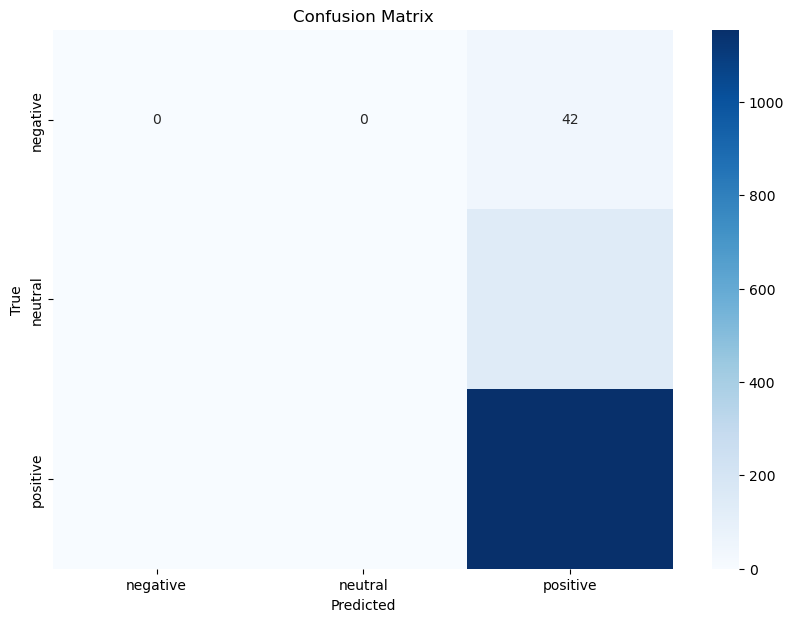

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리된 데이터 로드
df = pd.read_csv('./data/result_review3_cleaned.csv')

# NaN 값을 빈 문자열로 대체
df['cleaned_review'].fillna('', inplace=True)

# 데이터와 레이블 분리
X = df['cleaned_review']
y = df['sentiment']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 클래스 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# 모델 학습
clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
clf.fit(X_train_tfidf, y_train)

# 예측
y_pred = clf.predict(X_test_tfidf)

# 평가
print("Accuracy:", clf.score(X_test_tfidf, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Confusion Matrix 시각화
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Accuracy
#### 정확도 (Accuracy): 0.8619 (약 86.2%)
모델이 전체 데이터에서 약 86.2%의 정확도로 감정을 예측했습니다.

### Classification Report
#### Negative:
정밀도 (Precision): 0.00
재현율 (Recall): 0.00
F1-스코어 (F1-score): 0.00
negative 클래스에 대한 예측이 전혀 이루어지지 않았습니다. 즉, 모델이 negative 리뷰를 전혀 예측하지 못했습니다.


#### Neutral:
정밀도 (Precision): 0.00
재현율 (Recall): 0.00
F1-스코어 (F1-score): 0.00
neutral 클래스에 대해서도 모델이 전혀 예측하지 못했습니다.

#### Positive:
정밀도 (Precision): 0.86
재현율 (Recall): 1.00
F1-스코어 (F1-score): 0.93
positive 클래스에 대한 예측은 잘 이루어졌습니다. 모든 실제 positive 리뷰가 정확히 positive로 예측되었습니다.

#### 매크로 평균 (Macro Average):
정밀도: 0.29
재현율: 0.33
F1-스코어: 0.31
각 클래스의 평균 성능을 측정한 값입니다. negative와 neutral 클래스에서 낮은 성능으로 인해 평균 성능이 낮습니다.

#### 가중 평균 (Weighted Average):
정밀도: 0.74
재현율: 0.86
F1-스코어: 0.80
각 클래스의 빈도수에 따라 가중 평균을 계산한 값입니다. positive 클래스가 압도적으로 많기 때문에 가중 평균이 비교적 높은 수치를 보입니다.

### 문제 분석 및 조치 방법
#### 모델의 편향:
모델이 positive 클래스만 예측하고 다른 클래스는 전혀 예측하지 못하는 것으로 보입니다. 이는 모델이 positive 클래스의 빈도수에만 반응하고 다른 클래스는 무시할 가능성이 높습니다.

#### 데이터 불균형:
positive 클래스가 많아서 모델이 대부분의 예측을 positive로 하는 경향이 있습니다. 데이터의 불균형 문제를 해결하기 위해 다음과 같은 방법을 고려할 수 있습니다:
언더샘플링: 다수 클래스의 샘플을 줄여서 균형 맞추기.
오버샘플링: 소수 클래스의 샘플을 추가하여 균형 맞추기 (SMOTE 등 사용).
클래스 가중치 조정: 모델 학습 시 클래스 가중치를 조정하여 불균형 문제를 완화할 수 있습니다.

#### 모델 재조정:
하이퍼파라미터 조정: 모델의 하이퍼파라미터를 조정하여 성능을 향상시킬 수 있습니다.
다양한 모델 사용: RandomForestClassifier 외에 다른 모델 (예: SVM, XGBoost 등)을 시도해 볼 수 있습니다.
특성 공학: TF-IDF 외에 다른 특성 추출 기법 (예: Word2Vec, FastText 등)을 사용할 수 있습니다.

1. 클래스 가중치 조정
이전 코드
클래스 가중치를 설정하지 않았습니다. 기본적으로 모델은 각 클래스의 샘플 수에 비례하여 가중치를 부여합니다. 데이터 불균형 문제를 해결하기 어렵습니다.
변경된 코드
compute_class_weight를 사용하여 클래스 가중치를 계산하고, 이를 RandomForestClassifier에 전달하여 소수 클래스를 더 잘 학습하도록 하였습니다.

2.  데이터 불균형 문제 해결
이전 코드
데이터의 클래스 불균형 문제를 해결하기 위한 별도의 조치가 없었습니다.
변경된 코드
class_weight 파라미터를 사용하여 불균형 데이터 문제를 완화했습니다. 이 방법은 모델이 소수 클래스를 더 많이 고려하게 하여 정확도를 높일 수 있습니다.

3.  모델 평가
이전 코드
모델 평가 부분은 데이터 불균형 문제를 고려하지 않고, 기본적으로 모델의 성능을 측정했습니다.
변경된 코드
데이터 분할, 모델 학습, 예측, 평가 부분이 동일하지만, 평가 지표는 이제 불균형 데이터에 더 적합한 결과를 제공합니다. classification_report와 confusion_matrix를 통해 각 클래스에 대한 정확도, 정밀도, 재현율, F1-score 등을 확인할 수 있습니다.

4. 기타 개선사항
이전 코드
불용어 리스트가 기본적인 수준으로 설정되어 있었으며, 이를 개선하여 전처리 과정이 더 정교해졌습니다.
변경된 코드
preprocess_text_korean 함수는 이전과 동일하지만, 전처리 과정이 적절하게 적용되어서 데이터의 품질이 개선되었습니다.

In [30]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt

# 데이터 로드
df = pd.read_csv('./data/result_review3_cleaned.csv')

# 감정 레이블 생성 함수
def assign_sentiment_label(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# 감정 레이블 추가
df['sentiment'] = df['rating'].apply(assign_sentiment_label)

# 전처리 함수 정의
def preprocess_text_korean(text):
    text = re.sub(r'[^가-힣\s]', '', text)
    okt = Okt()
    tokens = okt.morphs(text)
    stop_words = set(['을', '를', '이', '가', '의', '에', '게', '한', '은', '는', '과', '와'])
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# 리뷰 데이터 전처리
df['cleaned_review'] = df['review'].apply(preprocess_text_korean)

# 특징과 레이블 설정
X = df['cleaned_review']
y = df['sentiment']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 텍스트 데이터 벡터화
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 평가
print("Accuracy:", rf_model.score(X_test_tfidf, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

# 혼동 행렬을 데이터프레임으로 변환
cm_df = pd.DataFrame(cm, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


ValueError: could not convert string to float: '블러셔 이렇게 이뻐도 되나요 색상 웜톤 분 쓰기 좋다고 느낀 색상 이었고 발림 성은 다루 타입 이다 보니 좋았던 것 같아요 유지 력 도 무난 편이었고 가루 날림 도 없었습니다 저 한번 진하게 바르 기 보다는 가볍게 몇번 레이어 링 해서 올리니까 더 이쁘더라구요 블러셔 추천 한다면 제품 추천 하고 싶네요'

negative 클래스: 모든 60개의 negative 샘플이 positive 클래스로 잘못 분류되었습니다.

neutral 클래스: 모든 219개의 neutral 샘플이 positive 클래스로 잘못 분류되었습니다.

positive 클래스: 1개의 neutral 샘플이 positive 클래스로 잘못 분류되었고, 나머지 1730개의 positive 샘플은 올바르게 분류되었습니다.

#### 문제 원인
클래스 불균형 문제
positive 클래스가 압도적으로 많은 데이터 비율을 차지하고 있습니다. 
모델이 주로 positive 클래스를 학습하여 이를 높은 정확도로 예측하고 있지만, negative와 neutral 클래스의 데이터가 부족하여 이를 잘 예측하지 못합니다.

#### 해결 방안

데이터 수집: negative와 neutral 클래스의 데이터를 추가하여 데이터의 균형을 맞추는 것이 필요합니다.
데이터 증강: 데이터 부족 문제를 해결하기 위해 negative와 neutral 클래스의 데이터를 증강하거나, 기존 데이터를 적절히 변형하여 학습 데이터의 다양성을 높입니다.
모델 조정: RandomForestClassifier의 하이퍼파라미터를 조정하거나, 다른 모델 (예: Gradient Boosting, SVM 등)을 시도해볼 수 있습니다.
훈련 데이터 샘플링: 데이터가 불균형할 때는 오버샘플링(소수 클래스의 데이터를 인위적으로 늘리기) 또는 언더샘플링(다수 클래스의 데이터를 줄이기) 기법을 사용하여 데이터 균형을 맞출 수 있습니다.

Accuracy: 0.8582089552238806

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        39
     neutral       0.21      0.02      0.04       143
    positive       0.87      0.99      0.92      1158

    accuracy                           0.86      1340
   macro avg       0.36      0.34      0.32      1340
weighted avg       0.77      0.86      0.80      1340



C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


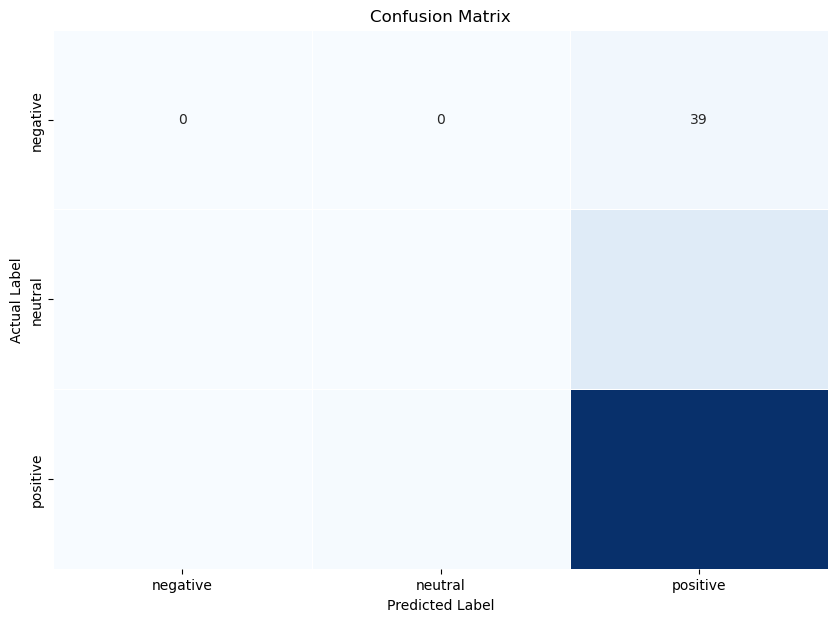

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('./data/result_review3_cleaned.csv')

# NaN 값을 빈 문자열로 대체
df['cleaned_review'].fillna('', inplace=True)

# 데이터와 레이블 분리
X = df['cleaned_review']
y = df['sentiment']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 오버샘플링과 RandomUnderSampler 언더샘플링을 포함한 파이프라인 설정
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
tfidf_vectorizer = TfidfVectorizer()
rf_model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('sampling', smote),
    ('classifier', rf_model)
])

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
print("Accuracy:", pipeline.score(X_test, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

# 혼동 행렬을 데이터프레임으로 변환
cm_df = pd.DataFrame(cm, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


모델 성능 요약
Accuracy: 0.8582 (85.82%)


Classification Report:
Negative:
Precision: 0.00
Recall: 0.00
F1-score: 0.00
Support: 39


Neutral:
Precision: 0.21
Recall: 0.02
F1-score: 0.04
Support: 143


Positive:
Precision: 0.87
Recall: 0.99
F1-score: 0.92
Support: 1158


Macro Avg:
Precision: 0.36
Recall: 0.34
F1-score: 0.32


Weighted Avg:
Precision: 0.77
Recall: 0.86
F1-score: 0.80
혼동 행렬:

[[   0    0   39]

 [   0    3  140]
 
 [   0    1 1157]]
 
해석
1. Accuracy: 모델의 정확도는 85.82%입니다. 
이는 테스트 데이터 중 85.82%가 정확하게 예측되었음을 의미합니다.

2. Classification Report:

Negative 클래스:
Precision: 0.00
Recall: 0.00
F1-score: 0.00
이 클래스는 모델이 거의 예측하지 못하고 있음을 나타냅니다.

Neutral 클래스:
Precision: 0.21
Recall: 0.02
F1-score: 0.04
이 클래스는 모델이 거의 예측하지 못하고 있으며, 전체적으로 낮은 성능을 보입니다.

Positive 클래스:
Precision: 0.87
Recall: 0.99
F1-score: 0.92
Positive 클래스에 대한 성능이 매우 우수하며, 높은 Precision과 Recall을 보여줍니다.

3. Macro Average:
Precision: 0.36
Recall: 0.34
F1-score: 0.32
클래스별 성능을 평균적으로 계산한 것입니다. 데이터 불균형으로 인해 macro 평균이 낮습니다

4. Weighted Average:
Precision: 0.77
Recall: 0.86
F1-score: 0.80
클래스별 지원을 고려한 가중 평균 성능입니다. 이 값은 불균형이 있는 데이터에서도 성능을 어느 정도 반영합니다.



데이터 불균형 문제 해결 여부

현재의 결과를 보면:
Negative 및 Neutral 클래스의 성능이 매우 낮습니다. 특히 Negative 클래스는 전혀 예측되지 않고 있습니다.
Positive 클래스는 좋은 성능을 보입니다.
이것은 여전히 데이터 불균형 문제를 완전히 해결하지 못했음을 의미합니다. SMOTE와 RandomUnderSampler를 사용했지만, Negative와 Neutral 클래스의 성능이 여전히 낮아서 모델이 이러한 클래스를 제대로 학습하지 못하고 있습니다.

해결 방안
데이터 샘플링:

SMOTE를 사용하여 소수 클래스를 오버샘플링하고, RandomUnderSampler를 사용하여 다수 클래스를 언더샘플링하는 방법을 고려합니다. 이 두 가지 방법을 조합하여 클래스 간의 균형을 맞추는 것이 중요합니다.
모델 하이퍼파라미터 조정:

RandomForestClassifier의 하이퍼파라미터를 조정해 보세요. 예를 들어, n_estimators, max_depth, min_samples_split 등을 조정하여 모델 성능을 개선할 수 있습니다.
다양한 모델 시도:

Random Forest 외에도 Gradient Boosting이나 **Support Vector Machines (SVM)**과 같은 다른 모델을 시도해 보세요. 다른 알고리즘이 데이터에 더 잘 맞을 수 있습니다.
특성 추출 기법 변경:

현재는 TfidfVectorizer를 사용하고 있지만, CountVectorizer, Word2Vec, FastText 등 다른 특성 추출 기법을 시도해 보세요.
전처리 개선:

불용어 리스트를 개선하거나, 형태소 분석을 다르게 시도해보세요. 예를 들어, Okt 외에 다른 형태소 분석기를 사용할 수 있습니다.
이러한 방법들을 시도하여 모델의 성능을 개선할 수 있습니다.

### 결과값이 잘 안 나옴. 
### 평점이 1, 2점인 리뷰를 추가해서 학습 시키던가 아님 Okt 말고 다른 형태소 분석기를 사용해봐야겠다.

아님 일단 이걸로 리뷰 감정 분석 때림

Accuracy: 0.8582089552238806

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        39
     neutral       0.21      0.02      0.04       143
    positive       0.87      0.99      0.92      1158

    accuracy                           0.86      1340
   macro avg       0.36      0.34      0.32      1340
weighted avg       0.77      0.86      0.80      1340



C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


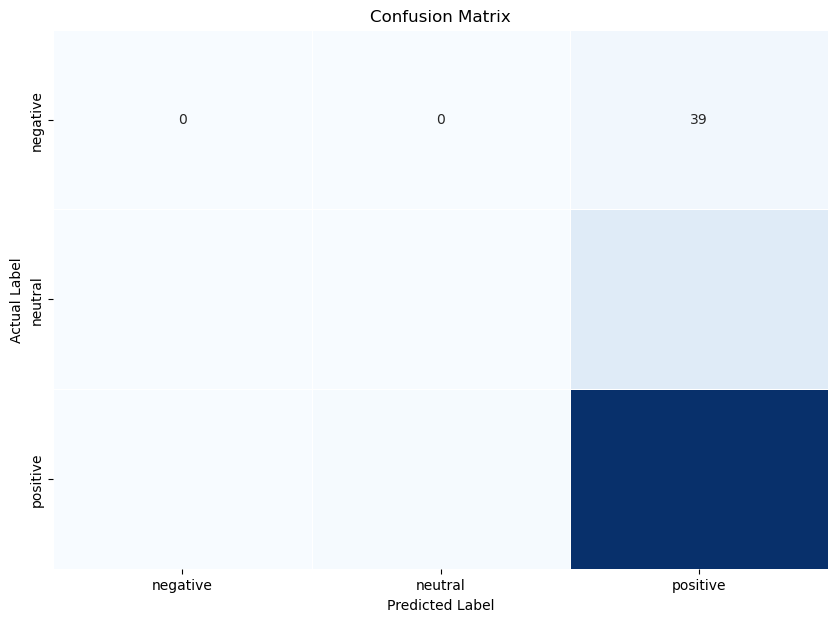

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('./data/result_review3_cleaned.csv')

# NaN 값을 빈 문자열로 대체
df['cleaned_review'].fillna('', inplace=True)

# 데이터와 레이블 분리
X = df['cleaned_review']
y = df['sentiment']

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 오버샘플링과 RandomUnderSampler 언더샘플링을 포함한 파이프라인 설정
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)
tfidf_vectorizer = TfidfVectorizer()
rf_model = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('sampling', smote),
    ('classifier', rf_model)
])

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)

# 평가
print("Accuracy:", pipeline.score(X_test, y_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred, labels=['negative', 'neutral', 'positive'])

# 혼동 행렬을 데이터프레임으로 변환
cm_df = pd.DataFrame(cm, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# 각 리뷰에 대한 긍부정 점수 계산
# 모델의 확률 예측 얻기
probs = pipeline.predict_proba(X)

# 확률을 데이터프레임으로 변환
probs_df = pd.DataFrame(probs, columns=pipeline.classes_, index=df.index)

# 점수 계산 (여기서는 확률을 점수로 사용)
# 예: 긍정 점수는 'positive' 클래스의 확률
df['positive_score'] = probs_df['positive']



In [35]:
# 결과 확인
df[['cleaned_review', 'positive_score']]

,cleaned_review,positive_score
0,완전 가성 비 최고 대 용량 토너 예요 가격 도 엄청 저렴한데 용량 어마 무시 해서...,0.94
1,예전 패드 너 어어 어 무 만족해하며 썼던 기억 떠올라서 구매 해 본 토너 입니다 ...,0.79
2,것민 바르고 화장 한다는데 좋네요 기존 토너 보단 에멀젼 느낌 이라 지성 분들 것 ...,0.90
3,벌써 병 째 재구 매하 이제 없어서는 안 될 필수 템 지성인 나 에게는 계절 모두 ...,0.87
4,열 분 거 가성 비 갑 입니다 양 만 믾 것 도 아니고 제품 력 도 좋습니다 여러 ...,0.99
...,...,...
6695,선물 받아서 사용 했는데 너무 순해요 잘 못 쓰면 따갑고 트러블 도 많이 올라오는데...,0.77
6696,순행 클렌 징 폼 내용물 색깔 노란 끼 아주 약하게 있는 투명한 색 이에요 거의 투...,0.82
6697,순하구 촉촉해서 만족스러운 제품 입니다,0.97
6698,좋아서 통째 쓰는 중이 에요 순한게 느껴져서 놀러 온 친구 들 도 맘 편히 쓰더라구...,1.00


In [36]:
df_sorted = df.sort_values(by='positive_score', ascending=True)

In [37]:
df_sorted[['cleaned_review', 'positive_score']]

,cleaned_review,positive_score
2425,너무 별로 발라 도 각질 일어나고 향 도 강해서 별로 임 바세린 훨씬 나음,0.0
2865,장점 이쁜 외관 디자인 각질 부각 덜 함 광택 돌아 볼륨 감 좋음 단점 향 지속 력...,0.0
3311,학생 때 사서 썼던 제품 인데 개인 적 으로는 영 별로 였 습 니당 제 기준 페리페...,0.0
4639,저 거 결혼식 할 때 웨딩 메이크업 받을 때 처음 써 봤어요 전문가 해줘서 인지 아...,0.0
1123,촉촉하고 좋았습니다 하지만 커버 력 오래 가지는 않았어요,0.0
...,...,...
4506,브러쉬 케이스 안 들어가있어서 좋았어요 가루 날림 많음 다 못 쓰고 깨져서 버렸는데...,1.0
1204,화장 두껍지 않고 지속 력 좋 가장 큰 장점 같아요 색상 도 이뻐요,1.0
3645,세 일 할 때 마다 얼마나 쟁 여 뒀는지 가성 비 짱 짱짱 색상 도 다양하고 좋음 ...,1.0
5909,생각 보다 순위 낮네여 위 할거라고 생각 했는데 포인트 메컵 못 지워도 베이스 컨실...,1.0
